In [2]:
!pip install sidetable
!pip install pandas-profiling==3.3.0


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Ignored the following versions that require a different python version: 3.3.0 Requires-Python >=3.7, <3.11; 3.4.0 Requires-Python >=3.7, <3.11; 3.5.0 Requires-Python >=3.7, <3.11; 3.6.0 Requires-Python >=3.7, <3.11; 3.6.1 Requires-Python >=3.7, <3.11; 3.6.2 Requires-Python >=3.7, <3.11; 3.6.3 Requires-Python >=3.7, <3.11; 3.6.4 Requires-Python >=3.7, <3.11; 3.6.5 Requires-Python >=3.7, <3.11; 3.6.6 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement pandas-profiling==3.3.0 (from versions: 3.0.0, 3.1.0, 3.2.0)
ERROR: No matching distribution found for pandas-profiling==3.3.0

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [3]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [4]:
# Read titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
type(df.isna().sum())

pandas.core.series.Series

In [6]:
df.isna().sum() #nulos por linha / nulls per line


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.isna().sum().to_frame('missing_count') #dataframe e nome coluna / dataframe and column name

,missing_count
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
# cria coluna contagem e percetagem de colunas com dados faltantes / creates count column and percentage of columns with missing data
df_missing = (
    df.isna().sum().to_frame('missing_count')
    .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
    .sort_values('missing_count', ascending=False)
)

styled_df_missing = df_missing.style.format('{:.2f}', subset=['missing_pct'])
display(styled_df_missing) 


,missing_count,missing_pct
deck,688,0.77
age,177,0.20
embarked,2,0.00
embark_town,2,0.00
survived,0,0.00
pclass,0,0.00
sex,0,0.00
sibsp,0,0.00
parch,0,0.00
fare,0,0.00


In [9]:
(df.isna().sum()/df.shape[0]).to_frame('missing_pct')


,missing_pct
survived,0.000000
pclass,0.000000
sex,0.000000
age,0.198653
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.002245
class,0.000000
who,0.000000


In [10]:
df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


# SideTable
### missing()


In [11]:
# com muito menos codigo, faltates, total e percentagem / with much less code, faults, total and percentage
df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


# missingno as msno

<AxesSubplot:>

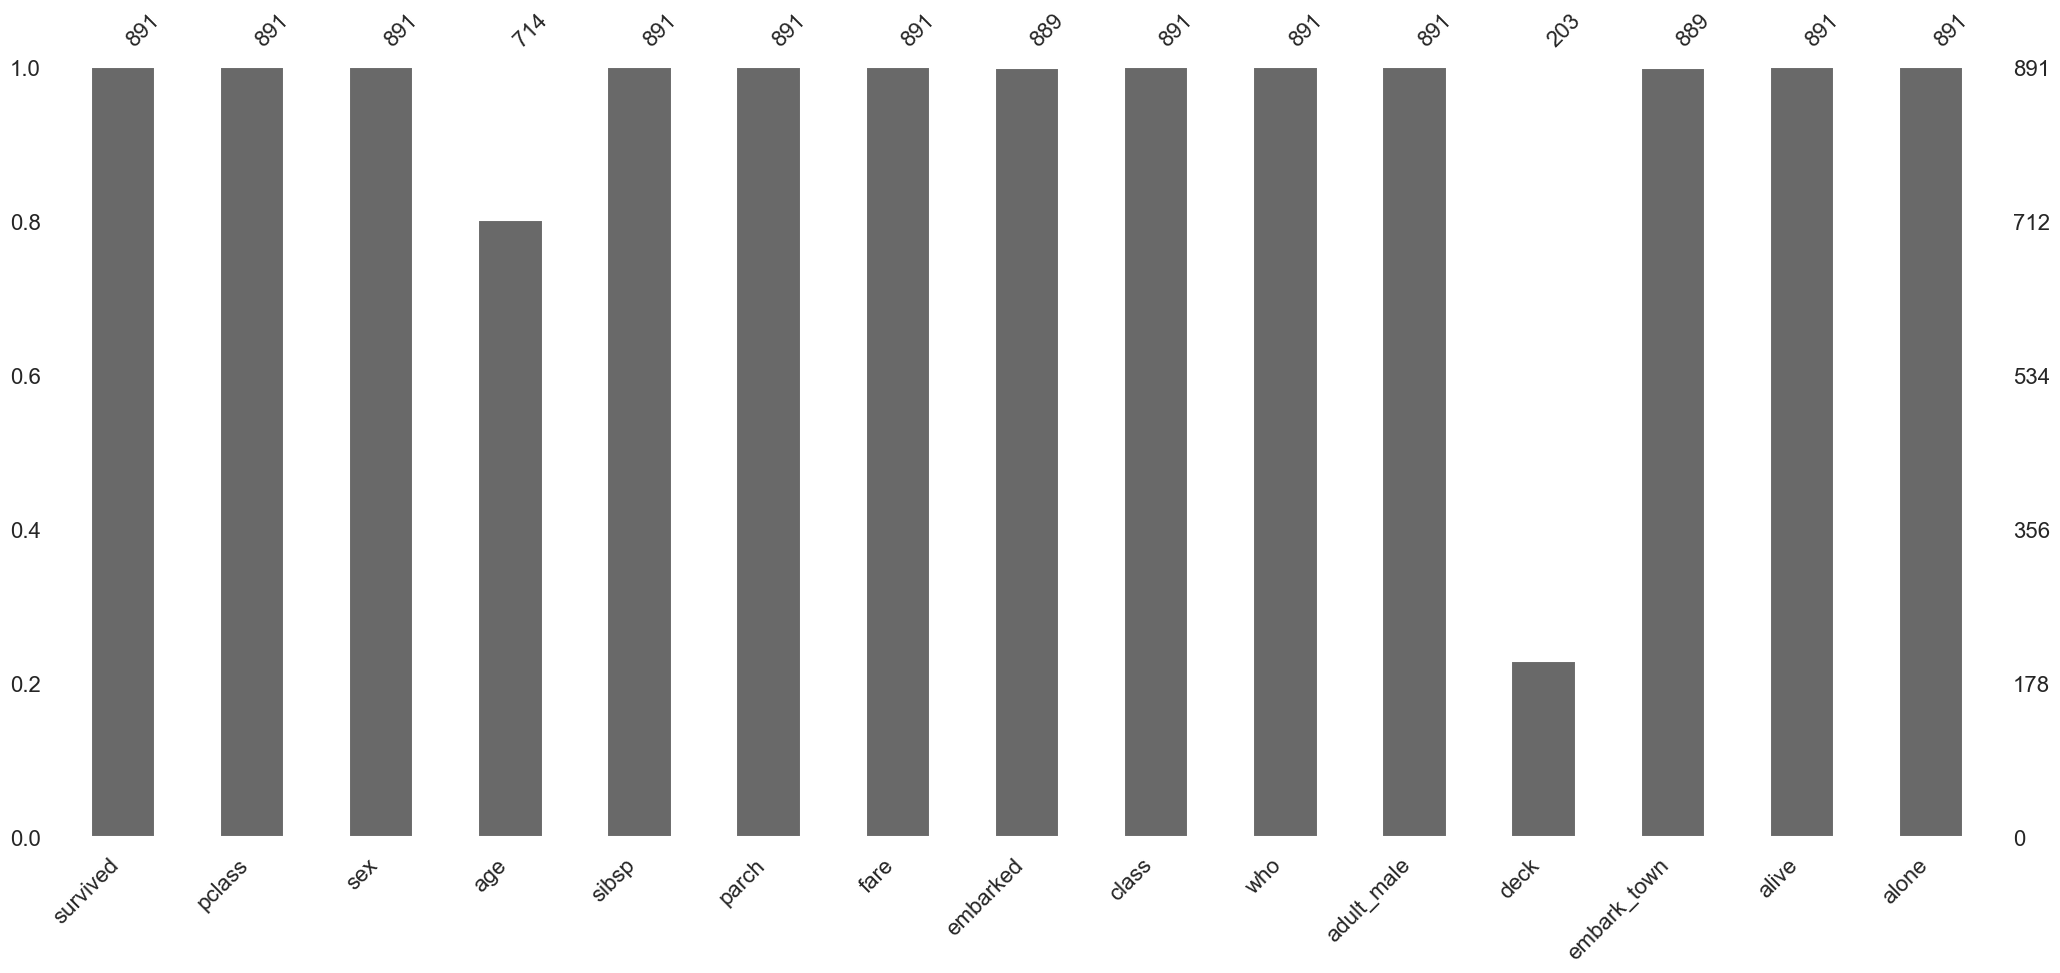

In [12]:
msno.bar(df) # faltantes por coluna com grafico / missing by column with graph

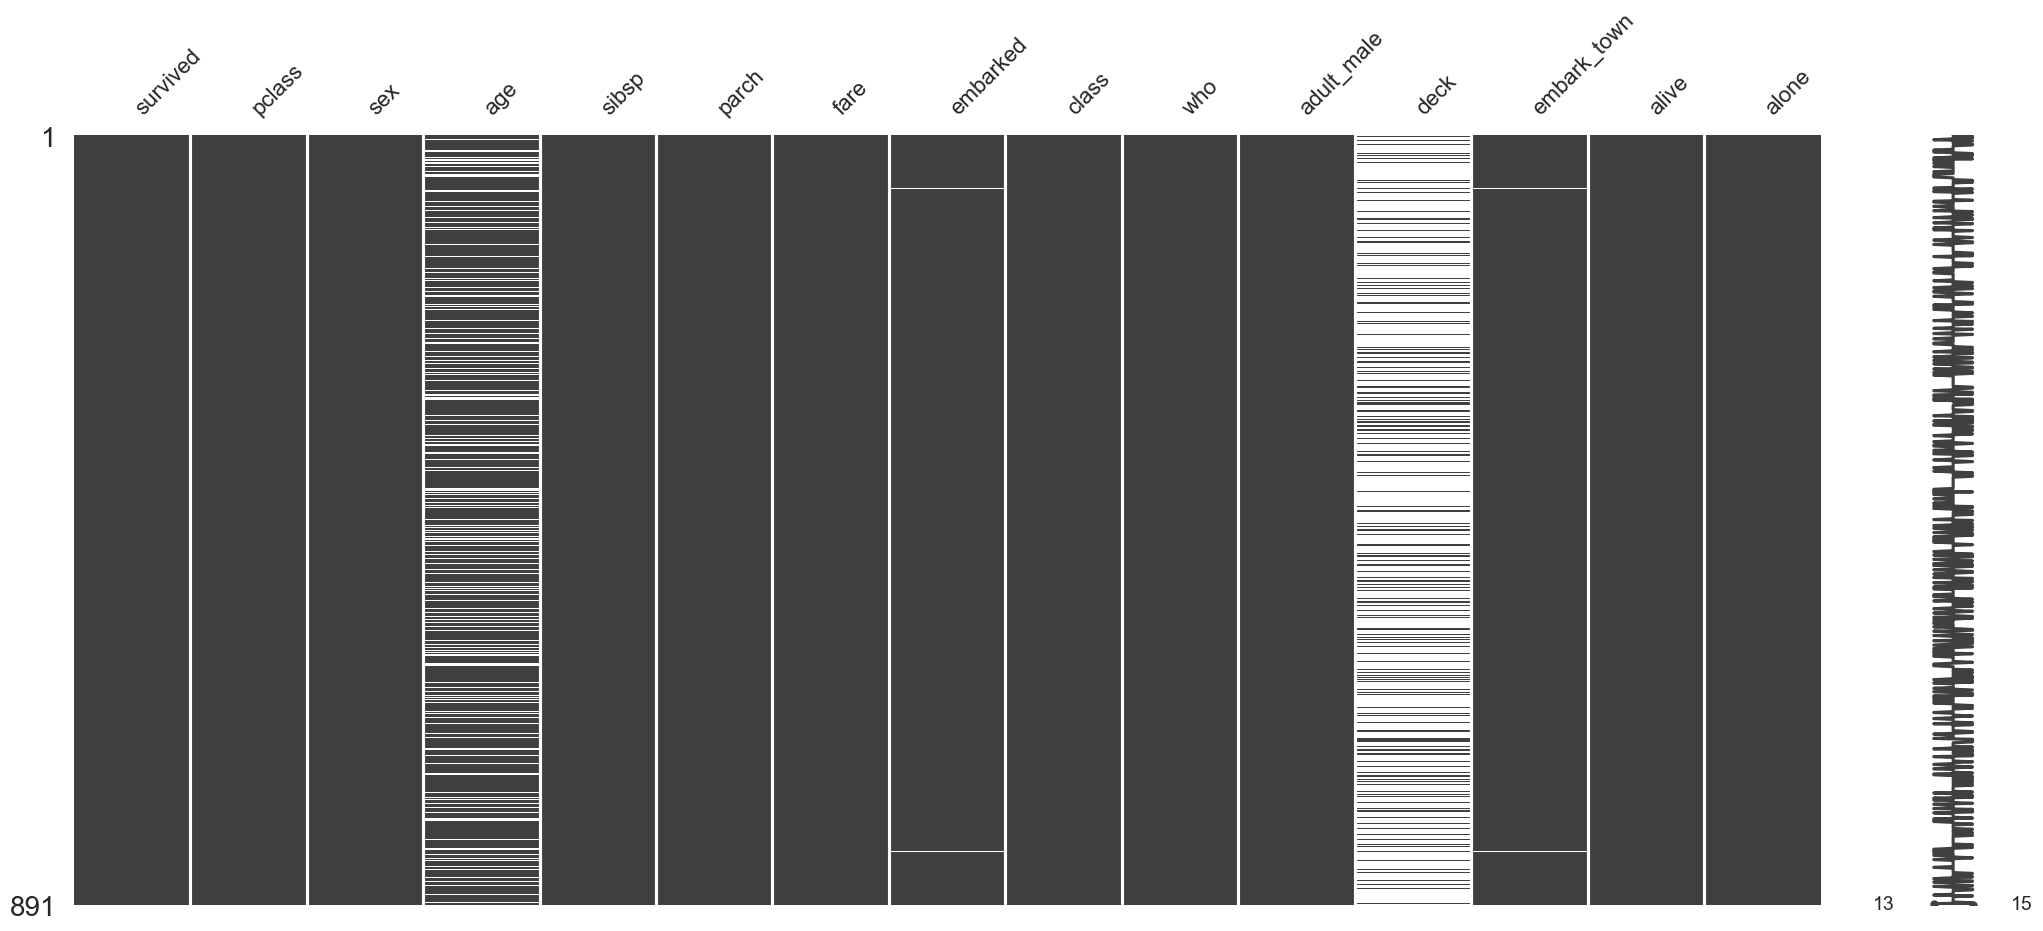

In [13]:
msno.matrix(df);# onde esta o velor faltante numa matrix? / Where is the missing velor in a matrix?
#ve um posicionamento do que esta faltando

In [14]:
df.isna().any() # tem algum valor faltante na coluna? / Is there a missing value in the column?

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [15]:
df.isna().any(axis=1) #qual linha tem numero faltante? / Which line has a missing number?


0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [16]:
df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [17]:
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


## removendo nulos / removing nulls

In [19]:
df.drop(columns=['deck']) # removendo a coluna que tem muitos dados faltando / removing the column that has a lot of missing data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### valor maximo de NA permitido por coluna / maximum NA value allowed per column


In [29]:
# valor maximo de NA permitido
max_nan_freq = .7

# Identificando colunas
na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols>max_nan_freq].index

# Dropando coluna com muitos NAs
df.drop(columns=cols2drop)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [31]:
# Dropando Inplace
df.drop(columns=cols2drop, inplace=True)

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [33]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [34]:
# imputando valores nulos - linha 888 AGE
df.fillna(0).tail()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [37]:
df.fillna({'age':0}) #trocou apenas NAN por zero, mas faz sentido?
#não seria mais real colocar uma media de idade?
#just replaced NAN with zero, but does it make sense?
#Wouldn’t it be more realistic to put an average age?

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [39]:
df.fillna({'age': df.age.mean()}).tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [41]:
df.fillna({'age': df.age.mean(), 'embarked': df.embarked.mode()[0]}).tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [45]:
# colocar o valor no depois, foward (proximo, abaixo)
df.fillna(method='ffill').tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,19.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [46]:
# colocar o valor no antes, before (proximo, abaixo)
df.fillna(method='bfill').tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,26.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [47]:
# interpolação
df.age.interpolate().tail()

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, dtype: float64

In [52]:
(
df.assign(
    age_bfill= df.age.bfill(),
    age_ffill= df.age.ffill(),
    age_interpolate = df.age.interpolate()
    )
    .filter(like='age').tail()
    .style.highlight_null('yellow')
)

,age,age_bfill,age_ffill,age_interpolate
886,27.000000,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000,19.000000
888,nan,26.000000,19.000000,22.500000
889,26.000000,26.000000,26.000000,26.000000
890,32.000000,32.000000,32.000000,32.000000


In [57]:
# imputação de NAs por grupo
df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

### Olhar outras bibliotecas:
SimpleImputer - 
InterativeImputer - 
KNNImputer